In [148]:
#@title
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import geom
from scipy.stats import kstest
from google.colab import drive

drive.mount('/content/drive')
url = '/content/drive/My Drive/Colab Notebooks/estadistica/datasetTarea2.csv'
df = pd.read_csv(url, decimal=',', quotechar='\'')

def printTable(table):
  col_width = max(len(word) for row in table for word in row) + 2  # padding
  for row in table:
      print("".join(word.ljust(col_width) for word in row))
  print("")

def plotHistogram(data, bins, title, show = False, cumu=False):
    histDetails = plt.hist(data, bins, density=True, cumulative=cumu)
    if(cumu):
      plt.title('CDF {}'.format(title))
    else:
      plt.title('PPF {}'.format(title))
    if(show):
      plt.legend(loc='best', frameon=False)
      plt.show()  
    return histDetails

def plotPoisson(l, loc, cumu = False, show = False):
  x = np.arange(poisson.ppf(0.01, l, loc), poisson.ppf(0.99, l, loc))  
  if(cumu):
    plt.plot(x, poisson.cdf(x, l, loc), label='poisson')
  else:
    plt.plot(x, poisson.pmf(x, l, loc), label='poisson')
  if(show):
    plt.show()

def plotGeom(p, loc, show = False):
  x = np.linspace(geom.ppf(0.01, p=p, loc=loc),
                  geom.ppf(0.99, p=p, loc=loc), 10)
  x = np.around(x)
  plt.plot(x, geom.pmf(x, p=p, loc=loc), 'bo', label='geom')
  if(show):
    plt.show()

def plotExpon(l, loc, cumu = False, show = False):
  scale = 1 / l
  x = np.linspace(expon.ppf(0.01, loc, scale),expon.ppf(0.99, loc, scale), 100)
  if(cumu):
    plt.plot(x, expon.cdf(x, loc, scale), label='expon', linestyle=":")
  else:
    plt.plot(x, expon.pdf(x, loc, scale), label='expon', linestyle=":")
  if(show):
    plt.show()

def plotNorm(loc, scale, cumu = False, show = False, ):
  x = np.linspace(norm.ppf(0.001, loc, scale),norm.ppf(0.999, loc, scale), 100)
  if(cumu):
    plt.plot(x, norm.cdf(x, loc, scale), label='norm')
  else:  
    plt.plot(x, norm.pdf(x, loc, scale), label='norm')
  if(show):
    plt.show()

def plotGamma(a, loc, scale, cumu = False, show = False):
  x = np.linspace(gamma.ppf(0.001, a, loc, scale), gamma.ppf(0.999, loc, scale), 100)
  if(cumu):
    plt.plot(x, gamma.cdf(x, a, loc, scale), label='gamma')
  else:
    plt.plot(x, gamma.pdf(x, a, loc, scale), label='gamma')
  if(show):
    plt.show()

#Only For n greater than 50 and a = 0.05
def evaluateD_a05(D, n):
  Dna = 1.35810 / np.sqrt(n)
  if(D > Dna):
    print('D = {} > Dna = {}, se acepta H0'.format(D, Dna))
  else:
    print('D = {} &lt; Dna = {},  se rechaza H0'.format(D, Dna))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Estadística para Ciencia de los Datos
# Presentado por Esteban García Solís
# Tarea #2
En esta asignación se busca que los estudiantes exploren un conjunto de datos y determinen qué distribución modela más efectivamente cada columna. En particular, se sugiere que los estudiantes utilicen el conjunto de datos provisto, pero queda abierto a la decisión de los estudiantes usar otros sets de datos .

Deberán tomar en cuenta todas las distribuciones vistas en clase pero no deben limitarse a ellas. Se espera que haya un uso significativo de bibliotecas como `matplotlib` para mostrar visualmente la comparación entre los datos y las distribuciones propuestas.

Los estudiantes deberán entregar a más tardar el día 29 de setiembre a las 10:00PM un notebook de colab con la solución a los siguientes ejercicios:

1. Elija alguna variable **cuantitativa** del set de datos y: 
  - Muestre el histograma calculado dinámicamente (e.g. con `matplotlib`) (2 puntos)
  - Brinde al menos una propuesta de distribución candidata que modela esa columna, definiendo los parámetros de la distribución y una gráfica de la distribución paramétrica con `matplotlib` (10 puntos)
  - Proporcione una explicación detallada de qué valores y distribuciones se probaron en el proceso y por qué se hizo la escogencia. (3 puntos)

2. Seleccione 3 columnas adicionales (también cuantitativas) y realize el mismo proceso del punto 2 (45 puntos)
 - Histograma (2 puntos)
 - Parámetros y gráfica (10 puntos)
 - Justificación (3 puntos)
 
3. Para cada columna aplicar una prueba KS  con un $\alpha=0.05$ para determinar si la muestra en efecto sigue la misma distribución que los estudiantes plantean. Si bien es cierto en clase se abordó la prueba KS para pruebas de normalidad, estas también se pueden utilizar para cualquier otro tipo de distribución
 - 4 columnas x 10 puntos cada una (40 puntos)
 - Debe mostrarse suficiente detalle gráfico y aritmético en su respuesta




**Generamos una descripción de los datos para facilitar el ajuste de parámetros en las distribuciones.**

In [149]:
df.describe()

,carat,depth,table,price,x,y,z,unknownCol
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.788450,61.788000,57.298500,3751.065000,5.703450,5.711200,3.524900,5.929425
std,0.492473,1.424959,2.280978,3884.761126,1.122998,1.117658,0.693152,0.857031
min,0.240000,56.900000,53.000000,394.000000,4.040000,4.060000,2.410000,3.997159
25%,0.407500,61.000000,56.000000,962.500000,4.735000,4.760000,2.897500,5.200000
50%,0.700000,61.800000,57.000000,2354.500000,5.640000,5.680000,3.480000,5.900000
75%,1.020000,62.600000,58.250000,4790.250000,6.465000,6.455000,4.010000,6.512438
max,2.530000,67.100000,64.000000,17103.000000,8.540000,8.480000,5.400000,8.462215


##Analisis para la columna "price"

En este caso como los valores son discretos se decidió probar la distribución geométrica y por la forma del histograma también se probó la distribución exponencial.

En el gráfico se aprecia que ambas distribuciones tienen un comportamiento muy similar y aproximan de forma casi idéntica al histograma.

para la exponencial se usó $\lambda = 0.00027$ y para la geométrica $p=0.00027$

Se seleciona la distribución **exponencial** por ser continua, lo que puede facilitar los cálculos para la prueba KS.

**Prueba KS:**

Con $\alpha = 0.05$, $D = 0.9993 > D_{n,\alpha} = 0.0960$, se acepta $H_0$

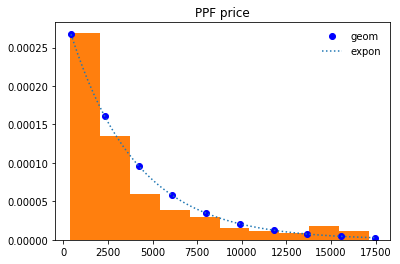

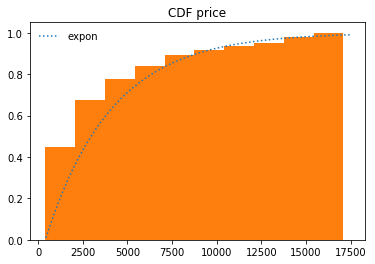

D = 0.9993818911080556 > Dna = 0.09603217195294503, se acepta H0


In [150]:
plotGeom(0.00027, 394)
plotExpon(0.00027, 394)
histPrice = plotHistogram(df['price'].values, 10, "price", True)

plotExpon(0.00027, 394, True)
histPrice = plotHistogram(df['price'].values, 10, "price", True, True)

(D, pValues) = kstest(df['carat'].values, lambda x: expon.cdf(x, loc=0.24, scale=(1/0.00027)))

evaluateD_a05(D, 200)


##Analisis para la columna "carat"

Se probaron las distribuciones gamma y exponencial debido a la forma del histograma.

Para la exponencial se usó $\lambda = 1.5$ y para la gamma $\alpha = 0.91$ y  $\beta = 1$ 

Se seleciona la distribución **exponencial** pues se asemeja más a la forma del histograma.

**Prueba KS:**

Con $\alpha = 0.05$, $D = 0.0936 &lt; D_{n,\alpha} = 0.0960$,  se rechaza $H_0$


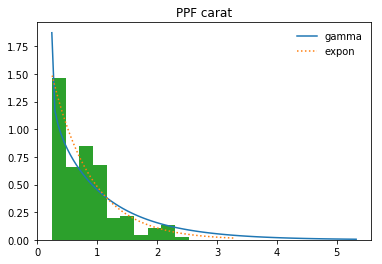

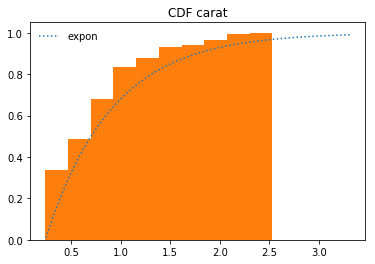

D = 0.09365402649977028 &lt; Dna = 0.09603217195294503,  se rechaza H0


In [151]:
plotGamma(0.91, 0.24, 1)
plotExpon(1.5, 0.24)
histCarat = plotHistogram(df['carat'].values, 10, "carat", True)

plotExpon(1.5, 0.24, True)
histCarat = plotHistogram(df['carat'].values, 10, "carat", True, True)

(D, pValues) = kstest(df['carat'].values, lambda x: expon.cdf(x, loc=0.24, scale=(1/1.5)))

evaluateD_a05(D, 200)

##Analisis para la columna "depth"

Se probaron las distribuciones gamma y normal debido a la forma del histograma.

Para la normal se usó $\mu = 61.78$ y $\sigma = 1.2$. Para la gamma $\alpha = 9$ y  $\beta = 0.5$ 

Se seleciona la distribución **normal** pues se asemeja más a la forma del histograma.

**Prueba KS:**

Con $\alpha = 0.05$, $D = 0.0798 &lt; D_{n,\alpha} = 0.0960$,  se rechaza $H_0$

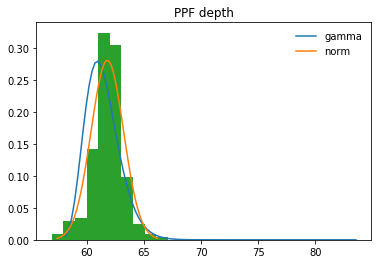

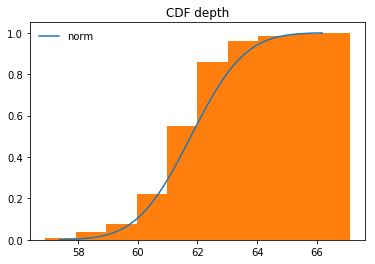

D = 0.07979081359897755 &lt; Dna = 0.09603217195294503,  se rechaza H0


In [152]:

plotGamma(9, 56.9, 0.5)
plotNorm(61.78, 1.424)
histDepth = plotHistogram(df['depth'].values, 10, "depth", True)


plotNorm(61.78, 1.424, True)
histDepth = plotHistogram(df['depth'].values, 10, "depth", True, True)

(D, pValues) = kstest(df['depth'].values, lambda x: norm.cdf(x, loc=61.78, scale=1.424))

evaluateD_a05(D, 200)

##Analisis para la columna "table"

Se probaron las distribuciones gamma y normal debido a la forma del histograma.

Para la normal se usó $\mu = 57.29$ y $\sigma = 2.5$. Para la gamma $\alpha = 2.6$ y  $\beta = 1.7$ 

Se seleciona la distribución **gamma** pues se asemeja más a la forma del histograma.

**Prueba KS:**

Con $\alpha = 0.05$, $D = 0.1496 > D_{n,\alpha} = 0.0960$, se acepta $H_0$

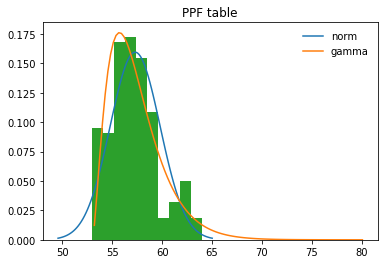

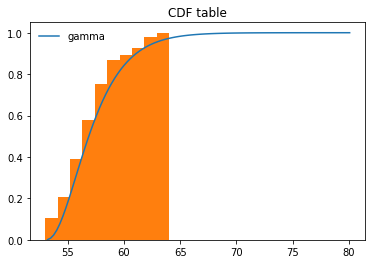

D = 0.14961652564906006 > Dna = 0.09603217195294503, se acepta H0


In [153]:
plotNorm(57.29, 2.5)
plotGamma(2.6, 53, 1.7)
histTable = plotHistogram(df['table'].values, 10, "table", True)

plotGamma(2.6, 53, 1.7, True)
histTable = plotHistogram(df['table'].values, 10, "table", True, True)

(D, pValues) = kstest(df['table'].values, lambda x: gamma.cdf(x, 2.6, loc=53, scale=1.7))

evaluateD_a05(D, 200)